In [1]:
# Imports
from ultralytics import YOLO
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image
import pyautogui

In [2]:
# Creating model
# This is a template of a model, which will need to jsut be trained and somewhat altered
model = YOLO('yolov8s.pt')
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s


Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /Users/nadeemee/PythonProjects/timberman/zidane.jpg: 384x640 2 persons, 2 ties, 87.5ms
Speed: 1.5ms preprocess, 87.5ms inference, 532.4ms postprocess per image at shape (1, 3, 384, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottl

(-0.5, 1279.5, 719.5, -0.5)

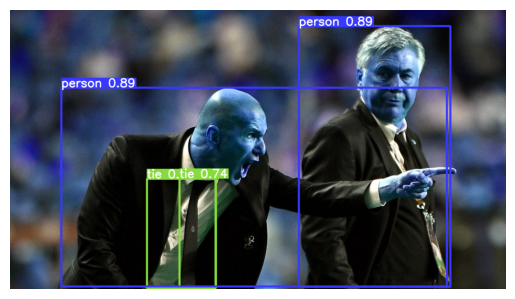

In [3]:
# Testing model
img = 'https://ultralytics.com/images/zidane.jpg'
results = model(img)
result = results[0]
print(results)
# Can just use result.plot() inplace of image within imshow, but will be shown as BGR instead of RGB
# image = cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB)
plt.imshow(results[0].plot())
plt.axis('off')


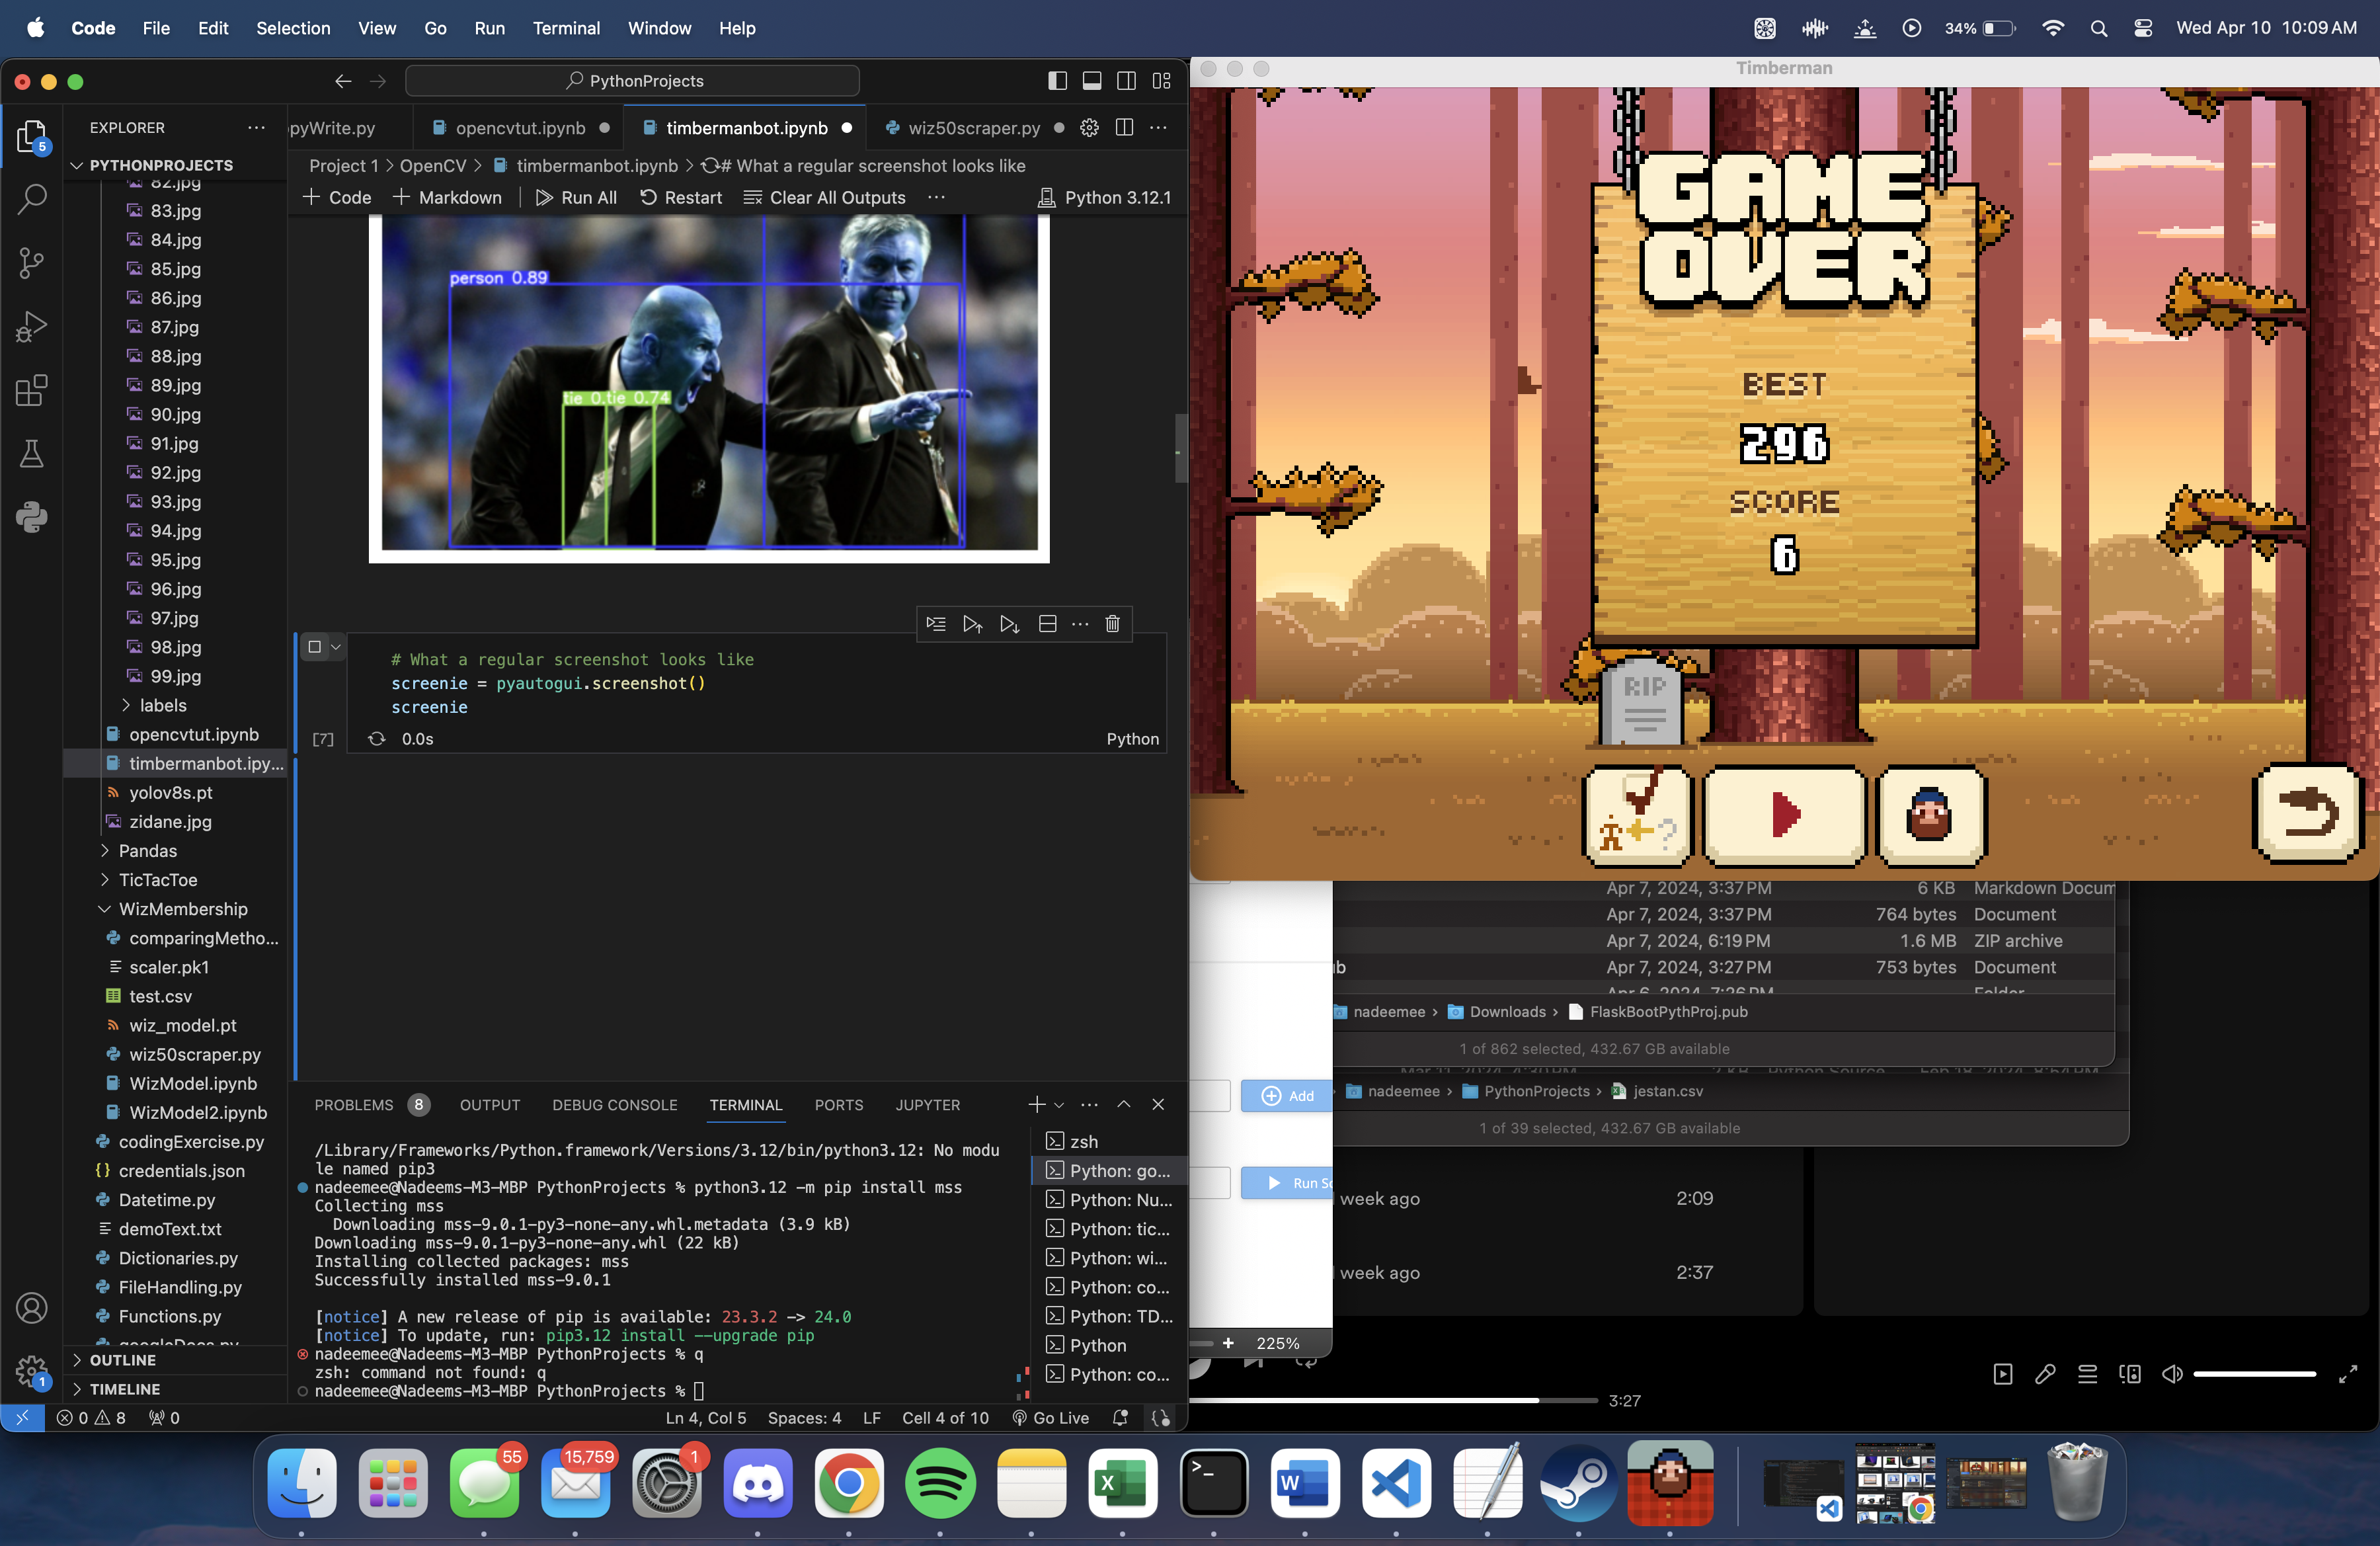

In [7]:
# What a regular screenshot looks like
screenie = pyautogui.screenshot()
screenie

(-0.5, 1799.5, 1199.5, -0.5)

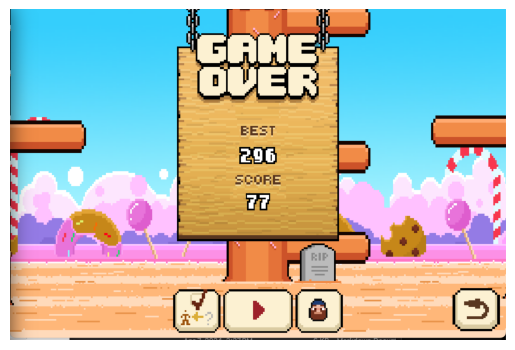

In [ ]:
# Showing a specific portion
plt.imshow(np.array(screenie)[140:1340, 1800:])
plt.axis('off')

In [3]:
# Attempt at alternative screenshots
from mss import mss
from PIL import Image

bounding_box = {'top': 80, 'left' : 900, 'width' : 900, 'height': 585}
sct = mss()

sct_img = sct.grab(bounding_box)
screen_arr = np.array(sct_img)
# Crop out region we don't want - height, width, channels
cropped = screen_arr[:, :, :]
# Convert color channel order
corrected_colors = cv2.cvtColor(cropped, cv2.COLOR_RGB2BGR)

# Make detections
results = model(corrected_colors)

cv2.imshow('YOLO',np.squeeze(results[0].plot()))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(100)
# plt.axis('off')


0: 416x640 (no detections), 88.3ms
Speed: 2.5ms preprocess, 88.3ms inference, 487.5ms postprocess per image at shape (1, 3, 416, 640)


2024-04-10 22:01:05.260 Python[28534:8192137] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


KeyboardInterrupt: 

: 

In [ ]:
# Capturing frames from screen
while True:
    # Take a screenshot
    screen = pyautogui.screenshot()
    # Convert to numpy array to modify screenshot
    screen_arr = np.array(screen)
    # Crop out region we don't want - height, width, channels
    cropped = screen_arr[25:1122, 1122:, :]
    # Convert color channel order
    corrected_colors = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
    
    # Make detections
    results = model(corrected_colors)
    
    cv2.imshow('YOLO', results[0].plot())
    
    # cv2.waitkey
    if (cv2.waitKey(1) & 0xFF) == ord('q'):
        break
# Close down frame
cv2.destroyAllWindows()


0: 288x640 (no detections), 62.8ms
Speed: 1.3ms preprocess, 62.8ms inference, 0.3ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 (no detections), 57.3ms
Speed: 1.3ms preprocess, 57.3ms inference, 0.3ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 (no detections), 60.3ms
Speed: 1.2ms preprocess, 60.3ms inference, 0.5ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 (no detections), 63.0ms
Speed: 1.2ms preprocess, 63.0ms inference, 0.4ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 (no detections), 66.2ms
Speed: 1.2ms preprocess, 66.2ms inference, 0.2ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 (no detections), 54.7ms
Speed: 1.2ms preprocess, 54.7ms inference, 0.2ms postprocess per image at shape (1, 3, 288, 640)


KeyboardInterrupt: 

: 

In [3]:
# Saving Images
import uuid
import os
import time

In [8]:
# /data/images
image_paths = os.path.join('data2','images')
# [left_obs, right_obs, timberman]
number_imgs = 100

NameError: name 'os' is not defined

In [10]:
# Getting the dataset
for img_num in range(number_imgs):
    
    print(f"Image num: {img_num}")
    
    
    sct_img = pyautogui.screenshot()
    screen_arr = np.array(sct_img)
    # Crop out region we don't want - height, width, channels
    cropped = screen_arr[140:1340, 1800:, :]
    img_name = os.path.join(image_paths, str(img_num)+'.jpg')
    corrected_colors = cv2.cvtColor(cropped, cv2.COLOR_RGB2BGR)
    cv2.imwrite(img_name, corrected_colors)
    # Make detections
    results = model(corrected_colors)
    cv2.imshow('YOLO', np.squeeze(results[0].plot()))
    time.sleep(0.2)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

Image num: 0

0: 448x640 1 traffic light, 94.0ms
Speed: 2.5ms preprocess, 94.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


2024-04-10 10:11:30.520 Python[19227:7815690] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


Image num: 1

0: 448x640 1 traffic light, 88.7ms
Speed: 1.6ms preprocess, 88.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
Image num: 2

0: 448x640 1 traffic light, 94.3ms
Speed: 1.7ms preprocess, 94.3ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
Image num: 3

0: 448x640 1 traffic light, 93.5ms
Speed: 1.6ms preprocess, 93.5ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)
Image num: 4

0: 448x640 (no detections), 87.5ms
Speed: 1.6ms preprocess, 87.5ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
Image num: 5

0: 448x640 (no detections), 90.4ms
Speed: 1.6ms preprocess, 90.4ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)
Image num: 6

0: 448x640 (no detections), 90.9ms
Speed: 1.5ms preprocess, 90.9ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
Image num: 7

0: 448x640 1 suitcase, 91.3ms
Speed: 1.7ms preprocess, 91.3ms inference, 1.3ms postprocess per image at shape 

: 

In [3]:
# Training model
results = model.train(data='dataset.yaml', epochs=100, imgsz=640, device='mps', fliplr=0.0)

New https://pypi.org/project/ultralytics/8.1.46 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.44 🚀 Python-3.12.1 torch-2.2.1 MPS (Apple M3 Pro)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=train21, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, 

train: Scanning /Users/nadeemee/PythonProjects/Project 1/OpenCV/data/labels.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]
val: Scanning /Users/nadeemee/PythonProjects/Project 1/OpenCV/data/labels.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]


Plotting labels to runs/detect/train21/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train21
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.217      2.327      1.065         22        320: 100%|██████████| 6/6 [00:08<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:07<00:14,  7.20s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:12<00:05,  5.84s/it]

WARNING ⚠️ NMS time limit 3.150s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:19<00:00,  6.37s/it]

                   all         87        203      0.364      0.186     0.0892     0.0445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.064      1.306      0.985         23        320: 100%|██████████| 6/6 [00:07<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


In [23]:
# Testing model
img = "/Users/nadeemee/PythonProjects/Project 1/OpenCV/data/images/99.jpg"
model = YOLO('/Users/nadeemee/PythonProjects/Project 1/OpenCV/runs/detect/train19/weights/best.pt')
model2 = YOLO('/Users/nadeemee/PythonProjects/Project 1/OpenCV/runs/detect/train19/weights/best_openvino_model')
model3 = YOLO('/Users/nadeemee/PythonProjects/Project 1/OpenCV/runs/detect/train19/weights/best.onnx')
model4 = YOLO('/Users/nadeemee/PythonProjects/Project 1/OpenCV/runs/detect/train19/weights/best.mlpackage')
# model.export(format='openvino')
# model.export(format='onnx')
# model.export(format='coreml')
results = model4(img)
print(results)

Loading /Users/nadeemee/PythonProjects/Project 1/OpenCV/runs/detect/train19/weights/best.mlpackage for CoreML inference...

image 1/1 /Users/nadeemee/PythonProjects/Project 1/OpenCV/data/images/99.jpg: 640x640 1 timberman, 1 left_obs, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'timberman', 1: 'left_obs', 2: 'right_obs', 3: 'game_over'}
obb: None
orig_img: array([[[ 89, 127, 185],
        [ 76, 114, 172],
        [ 80, 114, 173],
        ...,
        [130, 162, 205],
        [128, 159, 204],
        [138, 171, 217]],

       [[ 92, 130, 188],
        [ 77, 115, 173],
        [ 76, 113, 171],
        ...,
        [128, 160, 201],
        [127, 160, 205],
        [136, 171, 215]],

       [[ 90, 129, 184],
        [ 79, 117, 175],
        [ 77, 114, 174],
        ...,
        [127, 16

In [4]:
# Running a test using the model within the game
while True:
    sct_img = pyautogui.screenshot()
    screen_arr = np.array(sct_img)
    # Crop out region we don't want - height, width, channels
    cropped = screen_arr[140:1340, 1800:, :]
    corrected_colors = cv2.cvtColor(cropped, cv2.COLOR_RGB2BGR)
    # Make detections
    results = model(corrected_colors)
    cv2.imshow('YOLO', np.squeeze(results[0].plot()))    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()


0: 448x640 (no detections), 92.3ms
Speed: 1.8ms preprocess, 92.3ms inference, 0.2ms postprocess per image at shape (1, 3, 448, 640)


2024-04-10 21:56:46.299 Python[28333:8188094] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.



0: 448x640 (no detections), 91.8ms
Speed: 1.8ms preprocess, 91.8ms inference, 0.2ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 (no detections), 99.8ms
Speed: 1.7ms preprocess, 99.8ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 game_over, 100.5ms
Speed: 1.6ms preprocess, 100.5ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 game_over, 92.3ms
Speed: 1.6ms preprocess, 92.3ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 game_over, 93.0ms
Speed: 1.5ms preprocess, 93.0ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 game_over, 88.4ms
Speed: 3.6ms preprocess, 88.4ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 game_over, 89.8ms
Speed: 1.6ms preprocess, 89.8ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 game_over, 91.9ms
Speed: 1.5ms preprocess, 91.9ms inference, 0.8ms postpr

KeyboardInterrupt: 

: 

Loading /Users/nadeemee/PythonProjects/Project 1/OpenCV/runs/detect/train19/weights/best.mlpackage for CoreML inference...

0: 640x640 1 timberman, 1 right_obs, 14.2ms
Speed: 2.1ms preprocess, 14.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Old: [0.0, 2.0][[566.015625, 710.859375, 771.328125, 975.234375], [1009.3359375, 126.2109375, 1313.7890625, 247.8515625]]
[0.0, 2.0]
[[1032.1875, 705.9375, 1234.6875, 974.53125], [1009.3359375, 293.02734375, 1310.9765625, 410.80078125]]


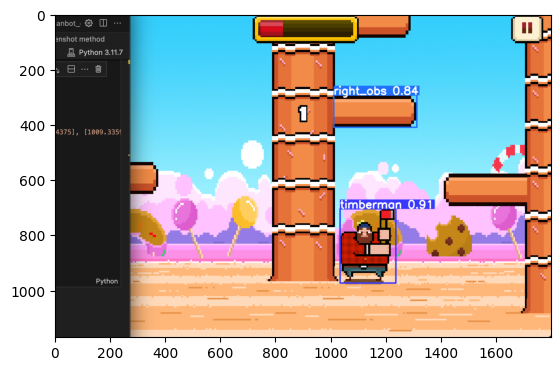

In [6]:
# Using different screenshot method
model = YOLO('yolov8s.pt')

# Attempt at alternative screenshots
from mss import mss
import mss.tools
from PIL import Image, ImageGrab
import subprocess

model = YOLO('/Users/nadeemee/PythonProjects/Project 1/OpenCV/runs/detect/train19/weights/best.pt')
model2 = YOLO('/Users/nadeemee/PythonProjects/Project 1/OpenCV/runs/detect/train19/weights/best_openvino_model/')
model3 = YOLO('/Users/nadeemee/PythonProjects/Project 1/OpenCV/runs/detect/train19/weights/best.mlpackage')

bounding_box = {'top': 80, 'left' : 900, 'width' : 900, 'height': 585}

# process = subprocess.Popen(['screencapture', '-R 80,900,900,585', '-x', '-t', 'png', '-'], stdout=subprocess.PIPE)
# output, _ = process.communicate()
# img = cv2.imdecode(np.frombuffer(output, dtype=np.uint8), cv2.IMREAD_COLOR)

# results = model3(img)
# plt.imshow(results[0].plot())

sct = mss.mss()
img = sct.grab(bounding_box)
img = np.array(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = model3(img)
plt.imshow(results[0].plot())
b = results[0].boxes.cls.tolist()
if 3 in b:
    print("GAME OVER FOUND")
    
print("Old: [0.0, 2.0][[566.015625, 710.859375, 771.328125, 975.234375], [1009.3359375, 126.2109375, 1313.7890625, 247.8515625]]")
print(b)
b1 = results[0].boxes.xyxy.tolist()
print(b1)
    

# while True:
#     sc = ImageGrab.grab()
#     sc = np.array(sc)
#     sc = cv2.cvtColor(sc, cv2.COLOR_RGB2BGR)
#     cv2.imshow('cv', sc)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cv2.destroyAllWindows()